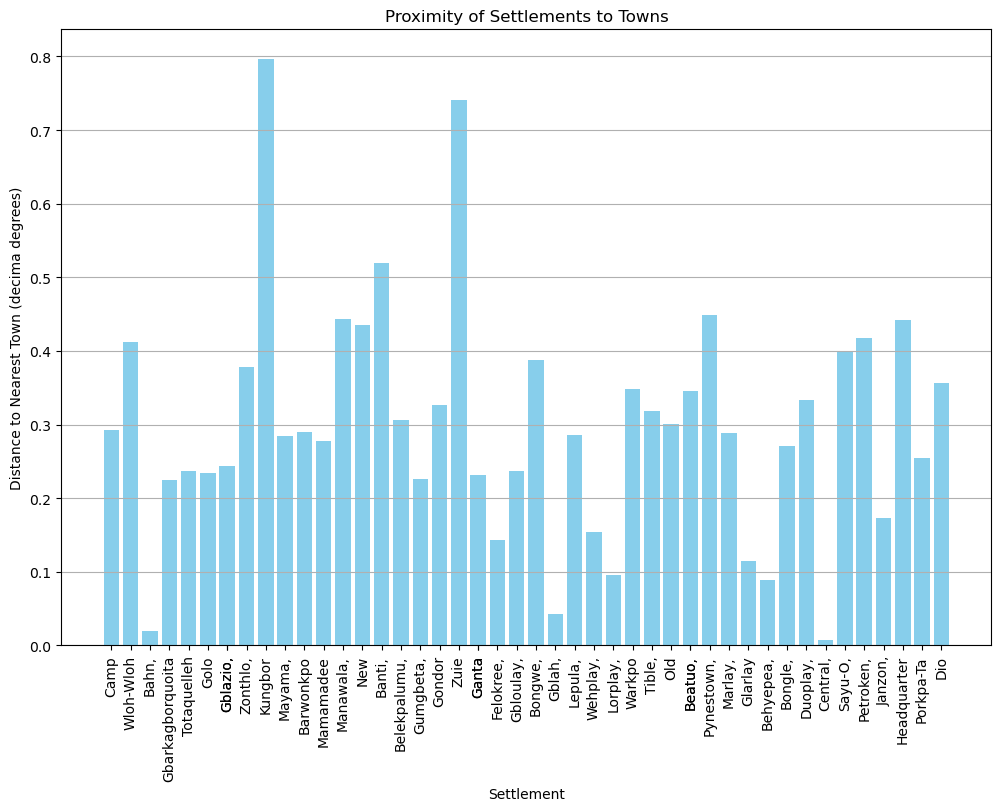

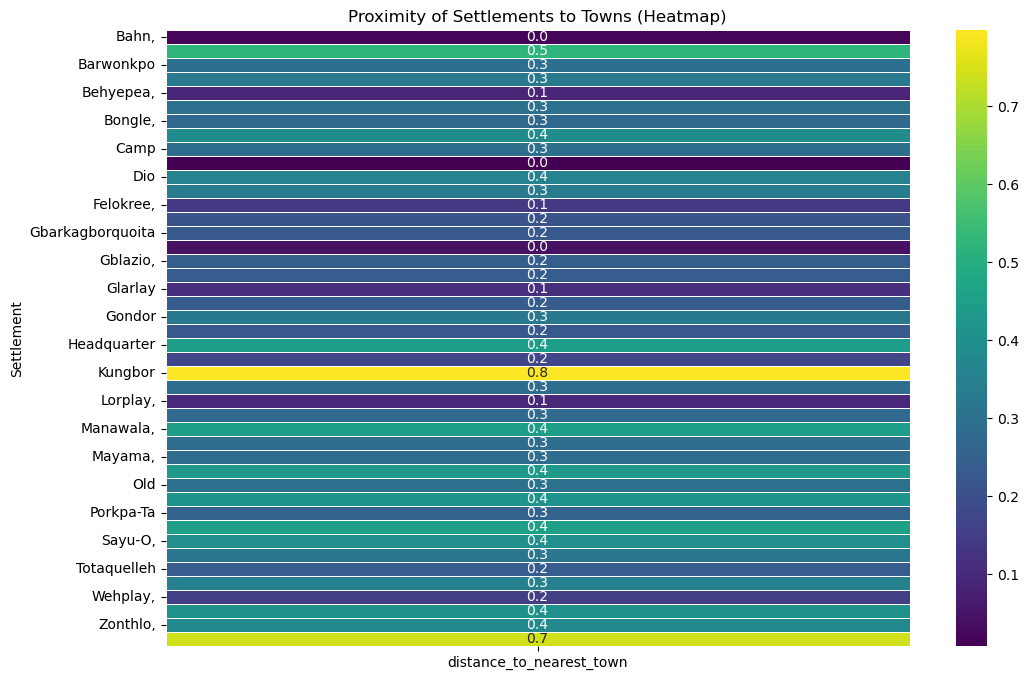

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
settlements = gpd.read_file('C:/Users/Lenovo/Downloads/FANCY DOCS/VIDA INTERVIEW/shapefiles/Geocoded_Locations.shp')
towns = gpd.read_file('C:/Users/Lenovo/Downloads/FANCY DOCS/VIDA INTERVIEW/Towns/towns.shp')
# Calculate the distance between each settlement and the nearest town
settlements['distance_to_nearest_town'] = settlements.geometry.apply(lambda x: x.distance(towns.unary_union))
# Plot the proximity to town for each settlement
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(settlements['Settlement'], settlements['distance_to_nearest_town'], color='skyblue')
ax.set_xticks(settlements['Settlement'])
ax.set_xticklabels(settlements['Settlement'], rotation=90)
ax.set_ylabel('Distance to Nearest Town (decima degrees)')
ax.set_xlabel('Settlement')
ax.set_title('Proximity of Settlements to Towns')
plt.grid(axis='y')
plt.show()
plt.figure(figsize=(12, 8))
heatmap_data = settlements.pivot_table(index='Settlement', values='distance_to_nearest_town', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)
plt.title('Proximity of Settlements to Towns (Heatmap)')
plt.show()